## Introduction

Email has become one of the most widely used communication tools, but it also brings the challenge of spam messages. Spam emails not only clutter inboxes but can also carry security threats such as phishing links and malware. Detecting spam automatically is therefore an important application of Natural Language Processing (NLP) and Machine Learning (ML).

In this project, we built a **Spam Email Detection System** using machine learning techniques. The dataset consists of labeled emails categorized as "ham" (legitimate) or "spam." We applied preprocessing steps and transformed the text into numerical features using **TF-IDF Vectorization**. Two popular classification algorithms, **Logistic Regression** and **Naive Bayes**, were trained and evaluated. Their performance was compared using metrics such as **Accuracy, Precision, Recall, F1-score, Confusion Matrix, and ROC Curve**.

The main goal of this project is to identify which algorithm performs better for spam detection and to highlight the trade-off between models in terms of precision and recall.


### Importing Required Libraries¶
We begin by importing the essential Python libraries used for data manipulation, visualization, and machine learning.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'mail_data.csv')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## EDA (Exploratory Data Analysis) And Preprocessing

In [4]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [6]:
df = df.where((pd.notnull(df)), '')

In [7]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [8]:
df.shape

(5572, 2)

In [9]:
df['Category'] = df['Category'].map({'spam': 0, 'ham': 1})

In [10]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

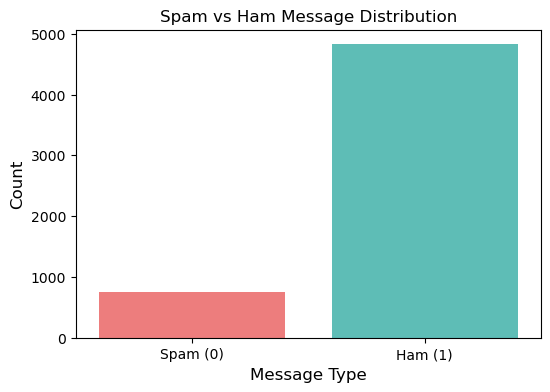

In [12]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x='Category', data=df, palette=['#FF6B6B','#4ECDC4'])
ax.set_xticklabels(['Spam (0)', 'Ham (1)'])
plt.title("Spam vs Ham Message Distribution", fontsize=12)
plt.xlabel("Message Type", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.show()

In [13]:
df.head()

,Category,Message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [15]:
ps = PorterStemmer()

In [16]:
X = df['Message']
Y = df['Category']

In [17]:
X

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object

In [18]:
Y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: int64

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X)
X_test_vec = vectorizer.transform(X)

In [20]:
def clean_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [ps.stem(word) for word in words if word not in stopwords.words('english')]
    return " ".join(words)

In [21]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\nk026\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [22]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    text = text.lower()
    text = re.sub(r'\d+', '', text)  # Removing numbers
    text = re.sub(r'\s+', ' ', text)  # Removing extra spaces
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

X = X.apply(lemmatize_text)

## Model Building And Splitting the Data¶
The dataset is split into training and testing sets to evaluate the model’s performance.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , roc_curve, roc_auc_score 
from sklearn.metrics import confusion_matrix ,mean_squared_error, r2_score , precision_score, recall_score, f1_score

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [25]:
X_train.shape

(4457,)

In [26]:
y_train.shape

(4457,)

In [27]:
X_test.shape

(1115,)

In [28]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words="english", binary=True)

In [29]:
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

In [30]:
y_train = y_train.astype("int")
y_test = y_test.astype("int")

In [31]:
X_train

1978    reply win £ weekly! fifa world cup held? send ...
3989    hello. sort town already. . dont rush home, ea...
3935              come guoyang go n tell her? u told her?
4078    hey sathya till dint meet even single time saw...
4086    orange brings ringtones time chart heroes, fre...
                              ...                        
3772    hi, wlcome back, wonder got eaten lion somethi...
5191                                    sorry, call later
5226            prabha..i'm soryda..realy..frm heart sory
5390                             nt joking seriously told
860                              say somebody named tampa
Name: Message, Length: 4457, dtype: object

In [32]:
print(X_train_features)

  (0, 4553)	0.225986353245767
  (0, 6186)	0.25596233994464473
  (0, 6128)	0.3040774275133349
  (0, 1885)	0.4225818458898968
  (0, 6267)	0.2880538655626572
  (0, 1240)	0.355317855726277
  (0, 2407)	0.4029083899425996
  (0, 4821)	0.20936004177346873
  (0, 5271)	0.22641011762077023
  (0, 1669)	0.2810095309999559
  (0, 4839)	0.25836881886752616
  (1, 2411)	0.2688758909358152
  (1, 5122)	0.3211516944178107
  (1, 5724)	0.290947744530884
  (1, 1517)	0.21704305113354483
  (1, 4678)	0.3617958985907373
  (1, 2471)	0.20742894390541305
  (1, 1615)	0.3399756751447024
  (1, 3591)	0.4043352903463092
  (1, 3044)	0.2348511127922463
  (1, 2925)	0.1898460629365657
  (1, 1724)	0.38551130961941754
  (2, 1044)	0.3438535424145375
  (2, 2309)	0.72067763946276
  (2, 5506)	0.3846841975040888
  :	:
  (4451, 3163)	0.3030259643942004
  (4451, 5131)	0.3030259643942004
  (4451, 5248)	0.3030259643942004
  (4452, 2235)	0.24427678635128447
  (4452, 2430)	0.28070835438509406
  (4452, 3086)	0.44625787911854536
  (4452, 6

In [33]:
print(X_test_features)

  (0, 954)	0.3544890127767951
  (0, 1256)	0.3668533914291446
  (0, 1358)	0.3062333500976008
  (0, 2373)	0.3943858397218959
  (0, 2530)	0.38340743557235407
  (0, 3066)	0.38340743557235407
  (0, 3205)	0.3446162470939948
  (0, 4003)	0.2787009018048494
  (1, 593)	0.39660613451462084
  (1, 1169)	0.38323897330648865
  (1, 2576)	0.3463711732088727
  (1, 3148)	0.3463711732088727
  (1, 4472)	0.4145027537407533
  (1, 5537)	0.22950301193126255
  (1, 5633)	0.22272995636616036
  (1, 6125)	0.4263715343888669
  (2, 530)	0.32750660512677676
  (2, 1553)	0.3543694900424638
  (2, 2217)	0.2286008544060438
  (2, 2235)	0.2286008544060438
  (2, 2640)	0.40183432683242387
  (2, 3455)	0.439869257770827
  (2, 4633)	0.45565518039274544
  (2, 5561)	0.31633455910406066
  (3, 1517)	0.345541635127022
  :	:
  (1110, 1558)	0.337725856322191
  (1110, 1612)	0.24545616011893906
  (1110, 1909)	0.23666214360351867
  (1110, 2235)	0.1694360618126198
  (1110, 2328)	0.3542165398683053
  (1110, 3049)	0.24274375323084846
  (1110,

## Model Accuracy
We evaluate the model’s accuracy on both training and test datasets. Evaluation

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
Xtrain_bal, ytrain_bal = smote.fit_resample(X_train_features, y_train)

### Logistic Regression

In [36]:
lr = LogisticRegression()

In [37]:
lr.fit(X_train_features, y_train)

LogisticRegression()

In [38]:
lr_pred = lr.predict(X_test_features)

In [39]:
lr_probs = lr.predict_proba(X_test_features)[:, 1]

In [40]:
prediction_train_data = lr.predict(X_train_features)
accuracy_train_data = accuracy_score(y_train, prediction_train_data)

In [41]:
prediction_test_data = lr.predict(X_test_features)
accuracy_test_data = accuracy_score(y_test, prediction_test_data)

In [42]:
print("Accuarcy on train data: ", accuracy_train_data*100)
print("Accuarcy on test data: ", accuracy_test_data*100)

Accuarcy on train data:  96.83643706529055
Accuarcy on test data:  96.7713004484305


### Naive Bayes

In [43]:
nb = MultinomialNB()

In [44]:
nb.fit(X_train_features, y_train)

MultinomialNB()

In [45]:
nb_pred = nb.predict(X_test_features)

In [46]:
nb_probs = nb.predict_proba(X_test_features)[:, 1]

In [47]:
prediction_train_data = nb.predict(X_train_features)
accuracy_train_data = accuracy_score(y_train, prediction_train_data)

In [48]:
prediction_test_data = nb.predict(X_test_features)
accuracy_test_data = accuracy_score(y_test, prediction_test_data)

In [49]:
print("Accuarcy on train data: ", accuracy_train_data*100)
print("Accuarcy on test data: ", accuracy_test_data*100)

Accuarcy on train data:  97.93583127664348
Accuarcy on test data:  96.8609865470852


## Making Predictions
Use the trained model to predict outcomes on the test set.

### Logistic Regression

In [50]:
input_user_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

input_data_features = feature_extraction.transform(input_user_mail)

prediction = lr.predict(input_data_features)

if prediction[0] == 1:
    print("--- This is a ham mail ---")
else:
    print("!!!! This is a spam mail !!!")

!!!! This is a spam mail !!!


### Naive Bayes

In [51]:
input_user_mail = ["SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info"]

input_data_features = feature_extraction.transform(input_user_mail)

prediction = nb.predict(input_data_features)

if prediction[0] == 1:   # 1 = spam, 0 = ham (check your encoding)
    print("!!!! This is a spam mail !!!")
else:
    print("--- This is a ham mail ---")


--- This is a ham mail ---


## Actual vs Predicted first 50 samples

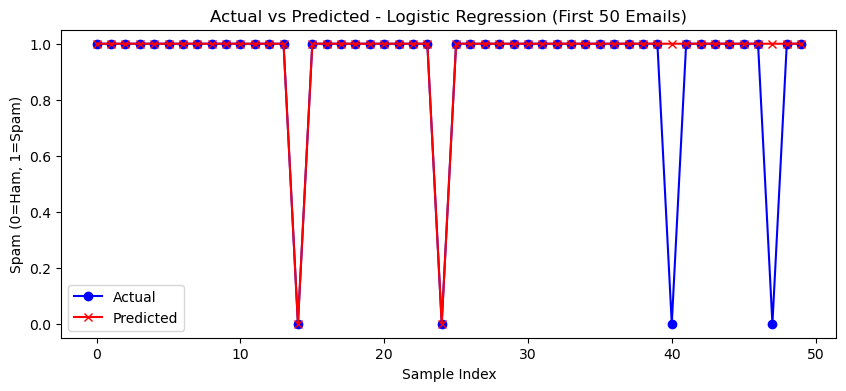

In [52]:
y_pred = lr.predict(X_test_features)

n = 50
y_test_sample = y_test.iloc[:n]
y_pred_sample = y_pred[:n]

# Line plot
plt.figure(figsize=(10,4))
plt.plot(range(n), y_test_sample, marker='o', label='Actual', color='blue')
plt.plot(range(n), y_pred_sample, marker='x', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Spam (0=Ham, 1=Spam)')
plt.title('Actual vs Predicted - Logistic Regression (First 50 Emails)')
plt.legend()
plt.show()

### Predictions for Naive Bayes

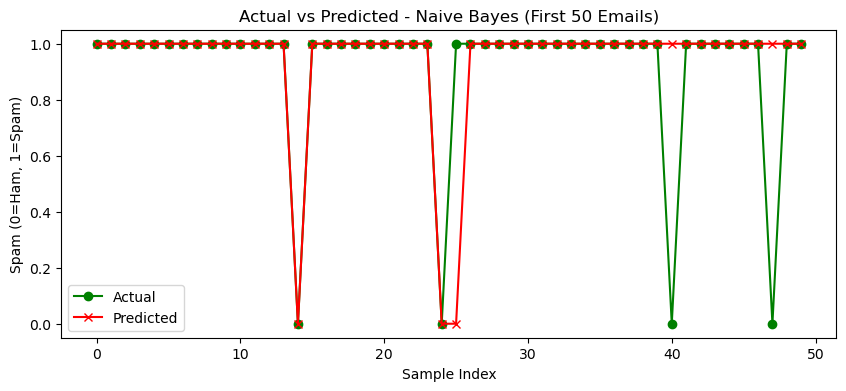

In [53]:
y_pred_nb = nb.predict(X_test_features)

# Sample size
n = 50
y_test_sample = y_test.iloc[:n]
y_pred_sample = y_pred_nb[:n]

# Line plot
plt.figure(figsize=(10,4))
plt.plot(range(n), y_test_sample, marker='o', label='Actual', color='green')
plt.plot(range(n), y_pred_sample, marker='x', label='Predicted', color='red')
plt.xlabel('Sample Index')
plt.ylabel('Spam (0=Ham, 1=Spam)')
plt.title('Actual vs Predicted - Naive Bayes (First 50 Emails)')
plt.legend()
plt.show()


### Logistic Regression misclassified

In [54]:
misclassified_idx = (lr_pred != y_test)
misclassified_samples = df.iloc[y_test[misclassified_idx].index]

print("Some Misclassified Messages (Logistic Regression):\n")
print(misclassified_samples[['Category','Message']].head(10))

Some Misclassified Messages (Logistic Regression):

      Category                                            Message
881          0  Reminder: You have not downloaded the content ...
1961         0  Guess what! Somebody you know secretly fancies...
3864         0  Oh my god! I've found your number again! I'm s...
2575         0  Your next amazing xxx PICSFREE1 video will be ...
3548         0  Rock yr chik. Get 100's of filthy films &XXX p...
2402         0  Babe: U want me dont u baby! Im nasty and have...
4527         0  I want some cock! My hubby's away, I need a re...
2663         0  Hello darling how are you today? I would love ...
1022         0  Guess what! Somebody you know secretly fancies...
751          0  Do you realize that in about 40 years, we'll h...


### Naive Bayes misclassified

In [55]:
misclassified_idx_nb = (nb_pred != y_test)
misclassified_samples_nb = df.iloc[y_test.index[misclassified_idx_nb]]

print("Some Misclassified Messages (Naive Bayes):\n")
print(misclassified_samples_nb[['Category','Message']].head(10))

Some Misclassified Messages (Naive Bayes):

      Category                                            Message
4937         1                           K..k.:)congratulation ..
881          0  Reminder: You have not downloaded the content ...
1961         0  Guess what! Somebody you know secretly fancies...
3864         0  Oh my god! I've found your number again! I'm s...
2575         0  Your next amazing xxx PICSFREE1 video will be ...
3548         0  Rock yr chik. Get 100's of filthy films &XXX p...
2402         0  Babe: U want me dont u baby! Im nasty and have...
4527         0  I want some cock! My hubby's away, I need a re...
2663         0  Hello darling how are you today? I would love ...
1022         0  Guess what! Somebody you know secretly fancies...


### Logistic Regression Performance

In [56]:
print("Logistic Regression Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Logistic Regression Performance:
Accuracy: 0.967713004484305
Confusion Matrix:
 [[113  36]
 [  0 966]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.76      0.86       149
           1       0.96      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Naive Bayes Performance

In [57]:
print("Naive Bayes Performance:")
print("Accuracy:", accuracy_score(y_test, nb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))
print("Classification Report:\n", classification_report(y_test, nb_pred))

Naive Bayes Performance:
Accuracy: 0.968609865470852
Confusion Matrix:
 [[115  34]
 [  1 965]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.77      0.87       149
           1       0.97      1.00      0.98       966

    accuracy                           0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



In [58]:
# Logistic Regression metrics
lr_acc = accuracy_score(y_test, lr_pred)
lr_prec = precision_score(y_test, lr_pred)
lr_rec = recall_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)


# Naive Bayes metrics
nb_acc = accuracy_score(y_test, nb_pred)
nb_prec = precision_score(y_test, nb_pred)
nb_rec = recall_score(y_test, nb_pred)
nb_f1 = f1_score(y_test, nb_pred)

### Comparison table

In [59]:
print("Model Performance Comparison")
print("-"*50)
print(f"Logistic Regression -> Accuracy: {lr_acc:.2f}, Precision: {lr_prec:.2f}, Recall: {lr_rec:.2f}, F1: {lr_f1:.2f}")
print(f"Naive Bayes         -> Accuracy: {nb_acc:.2f}, Precision: {nb_prec:.2f}, Recall: {nb_rec:.2f}, F1: {nb_f1:.2f}")

Model Performance Comparison
--------------------------------------------------
Logistic Regression -> Accuracy: 0.97, Precision: 0.96, Recall: 1.00, F1: 0.98
Naive Bayes         -> Accuracy: 0.97, Precision: 0.97, Recall: 1.00, F1: 0.98


### ROC Curve Comparison

In [60]:
# ROC curve - Logistic Regression
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# ROC curve - Naive Bayes
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

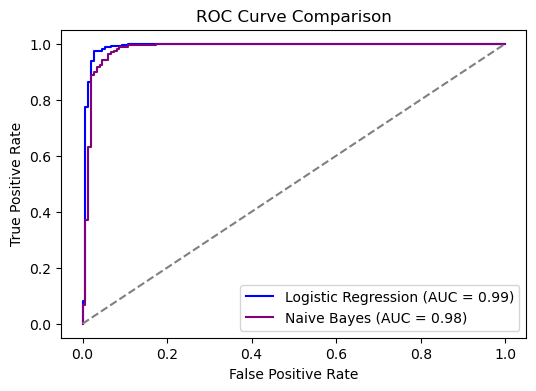

In [61]:
# Plot
plt.figure(figsize=(6,4))
plt.plot(lr_fpr, lr_tpr, label=f"Logistic Regression (AUC = {lr_auc:.2f})", color="blue")
plt.plot(nb_fpr, nb_tpr, label=f"Naive Bayes (AUC = {nb_auc:.2f})", color="purple")
plt.plot([0,1], [0,1], linestyle="--", color="gray")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

### Insights

- **Accuracy**: Overall correctly classified emails (both spam & ham). High accuracy = model is generally correct.  
- **Precision**: Out of all emails predicted as spam, how many were actually spam. High precision = fewer false alarms.  
- **Recall**: Out of all actual spam emails, how many the model caught. High recall = fewer spam emails missed.  
- **F1 Score**: Balance between Precision and Recall. Useful when dataset is imbalanced.  

### confusion_matrix

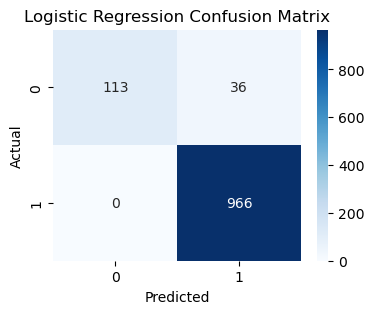

In [62]:
cm_lr = confusion_matrix(y_test, lr_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

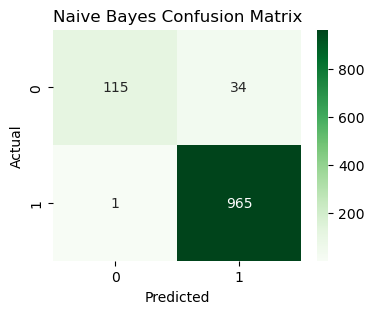

In [63]:
cm_nb = confusion_matrix(y_test, nb_pred)
plt.figure(figsize=(4,3))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens')
plt.title("Naive Bayes Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [64]:
import pickle
pickle.dump(lr, open("Email Spam model.pkl", "wb"))
pickle.dump(feature_extraction, open("feature_extraction.pkl", "wb"))

print("Model saved as Email Spam model.pkl")

Model saved as Email Spam model.pkl


## Conclusion

The project successfully demonstrated how machine learning can be applied to email spam detection. Both Logistic Regression and Naive Bayes performed well, but with different strengths:

- **Logistic Regression** showed higher accuracy and precision, making it more reliable in avoiding false alarms (classifying legitimate emails as spam).
- **Naive Bayes** achieved better recall, meaning it caught more spam emails, though with slightly more false positives.

Overall, Logistic Regression can be preferred when minimizing false positives is critical, while Naive Bayes is useful in scenarios where catching as many spam emails as possible is the priority.  

This project highlights the importance of evaluating multiple models rather than relying on a single approach. Future improvements could include experimenting with deep learning models (such as RNNs or transformers), using larger datasets, or deploying the model as a real-time spam filter.  

By completing this project, we gained hands-on experience with NLP preprocessing, feature extraction, model training, and evaluation — skills that are directly applicable in real-world AI/ML problems.